In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import kpss,adfuller

from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

plt.rcParams['figure.figsize'] = (20.0,10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

import itertools
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("D:\Data scientist\Project\Air Price LSTM\AirPassengers.csv")

In [8]:
df.tail(3)

,Month,#Passengers
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [57]:
pd.set_option('display.max_rows', 500)

In [76]:
df.dtypes

#Passengers    int64
dtype: object

In [32]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')

In [33]:
df.set_index(['Month'],inplace=True)

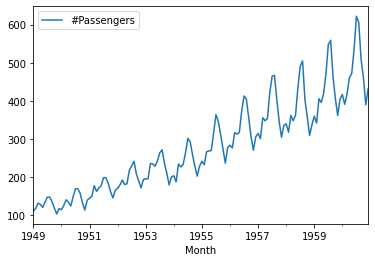

In [34]:
df.plot()

In [35]:
result = seasonal_decompose(df, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64
Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01  

In [36]:
df_reconstructed = pd.concat([result.seasonal,result.trend,result.resid,result.observed],axis=1)
df_reconstructed.columns = ['seas','trend','resid','actual_values']

In [38]:
df_reconstructed.tail(20)

,seas,trend,resid,actual_values
Month,,,,
1959-05-01,-4.506313,420.500000,4.006313,420.0
1959-06-01,35.402778,425.500000,11.097222,472.0
1959-07-01,63.830808,430.708333,53.460859,548.0
1959-08-01,62.823232,435.125000,61.051768,559.0
1959-09-01,16.520202,437.708333,8.771465,463.0
1959-10-01,-20.642677,440.958333,-13.315657,407.0
1959-11-01,-53.593434,445.833333,-30.239899,362.0
1959-12-01,-28.619949,450.625000,-17.005051,405.0
1960-01-01,-24.748737,456.333333,-14.584596,417.0


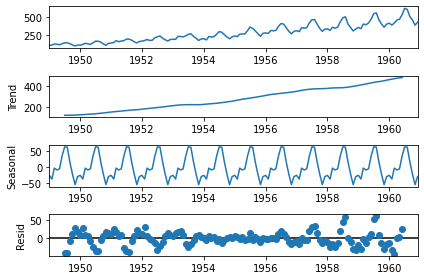

In [47]:
result.plot()
plt.show()

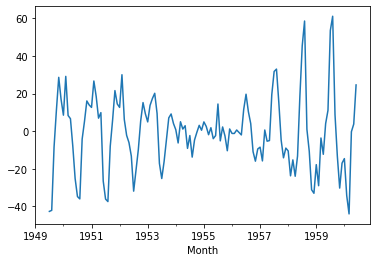

In [43]:
df_reconstructed.resid.plot()

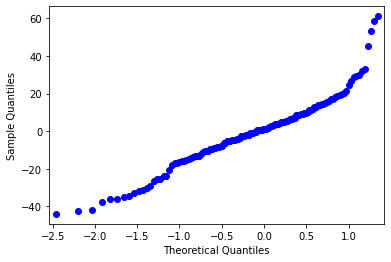

In [66]:
sm.qqplot(df_reconstructed.resid)
plt.show()
#sm.qqplot(np.random.randn(1000))

In [143]:
plot_acf(df_reconstructed.resid.values)
plt.show()

AttributeError: 'SARIMAXResults' object has no attribute 'values'

In [69]:
df_reconstructed.resid

Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
1949-12-01    16.869949
1950-01-01     8.498737
1950-02-01    29.104798
1950-03-01     8.324495
1950-04-01     6.619949
1950-05-01    -7.910354
1950-06-01   -25.152778
1950-07-01   -34.747475
1950-08-01   -35.989899
1950-09-01    -4.228535
1950-10-01     5.226010
1950-11-01    16.051768
1950-12-01    13.911616
1951-01-01    12.623737
1951-02-01    26.646465
1951-03-01    18.407828
1951-04-01     6.911616
1951-05-01     9.839646
1951-06-01   -26.486111
1951-07-01   -36.080808
1951-08-01   -37.406566
1951-09-01    -7.978535
1951-10-01     5.809343
1951-11-01    21.551768
1951-12-01    14.453283
1952-01-01    12.623737
1952-02-01    29.979798
1952-03-01     6.199495
1952-04-01    -2.255051
1952-05-01    -6.077020
1952-06-01

In [90]:
#ADF TEST
result = adfuller(df['#Passengers'])
print(f'ADF statistics : {result[0]}')
print(f'p-value: {result[1]}')
for key , value in result[4].items():
    print('critical values:')
    print(f' {key}, {value}')
    
    

ADF statistics : 0.8153688792060423
p-value: 0.9918802434376409
critical values:
 1%, -3.4816817173418295
critical values:
 5%, -2.8840418343195267
critical values:
 10%, -2.578770059171598


In [81]:
#KPSS TEst
result = kpss(df['#Passengers'])
print('\n KPSS statistics is &f' % result[0])
print('p-value: %f ' % result[1])
for key , value in result[3].items():
    print('critical values:')
    print(f' {key}, {value}')
    


 KPSS statistics is &f
p-value: 0.010000 
critical values:
 10%, 0.347
critical values:
 5%, 0.463
critical values:
 2.5%, 0.574
critical values:
 1%, 0.739


C:\Users\Bhavesh\Miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [108]:
train_data = df['1949-01-01' : '1959-12-01']
test_data = df['1960-01-01' : '1960-12-01']

In [109]:
model = ARIMA(train_data,order= (1,1,1))
model_fit = model.fit()

In [110]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -625.221
Method:                       css-mle   S.D. of innovations             28.510
Date:                Wed, 24 Jun 2020   AIC                           1258.441
Time:                        23:36:58   BIC                           1269.942
Sample:                    02-01-1949   HQIC                          1263.115
                         - 12-01-1959                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3979      3.104      0.773      0.440      -3.685       8.481
ar.L1.D.#Passengers    -0.5459      0.098     -5.594      0.000      -0.737      -0.355
ma.L1.D.#Passengers     0.9279      0.048     19.246      0.000       0.833       1.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8319           +0.0000j            1.8319            0.5000
MA.1           -1.0777           +0.0000j            1.0777            0.5000
-----------------------------------------------------------------------------
"""

In [137]:
aic = []
for p in range(1,4):
    for d in range(1,3):
        for q in range(1,4):
            try:
                model = ARIMA(train_data,order= (p,d,q))
                model_fit = model.fit()
                aic.append(model_fit.aic)
                print("p:{}   d:{}   q:{}  aic:{} ".format(p,d,q, model_fit.aic))
            except:
                continue
print("MIN AIC : {}".format(min(aic)))             

p:1   d:1   q:1  aic:1258.4414811977567 
p:1   d:1   q:2  aic:1239.9727801703748 
p:1   d:1   q:3  aic:1240.9537598237143 
p:1   d:2   q:1  aic:1265.8617152944223 
p:1   d:2   q:2  aic:1256.3312749632803 
p:1   d:2   q:3  aic:1256.8900428934098 
p:2   d:1   q:1  aic:1230.3036216193436 
p:2   d:1   q:2  aic:1218.682812429086 
p:2   d:1   q:3  aic:1218.2434528076487 
p:2   d:2   q:1  aic:1261.8740772026867 
p:2   d:2   q:2  aic:1256.989635239594 
p:3   d:1   q:1  aic:1230.8276578939135 
p:3   d:1   q:2  aic:1228.699453088638 
p:3   d:1   q:3  aic:1208.8063175487991 
p:3   d:2   q:1  aic:1259.5568797085143 
p:3   d:2   q:2  aic:1257.927894685174 
p:3   d:2   q:3  aic:1232.8460272307032 
MIN AIC : 1208.8063175487991


In [116]:
#Define the d and q parameter to take any value between 0 and 1
q=d = range(0,2)
#Define the p parameter to take any value between 0 and 3
p =range(0,4)
#Generate all different combinations of p and q and d triplete
pdq = list(itertools.product(p,d,q))

# Genearate all different combinationsof seasonal p,q and triplets
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print("Example of parameter combination of seasonal ARIMA....")
print("SARIMAX:{} x {} ".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} x {} ".format(pdq[1],seasonal_pdq[2]))
print("SARIMAX:{} x {} ".format(pdq[2],seasonal_pdq[3]))
print("SARIMAX:{} x {} ".format(pdq[2],seasonal_pdq[4]))

Example of parameter combination of seasonal ARIMA....
SARIMAX:(0, 0, 1) x (0, 0, 1, 12) 
SARIMAX:(0, 0, 1) x (0, 1, 0, 12) 
SARIMAX:(0, 1, 0) x (0, 1, 1, 12) 
SARIMAX:(0, 1, 0) x (1, 0, 0, 12) 


In [126]:
AIC = []
SARIMAX_model = []
for param in pdq:
    for seasonal_param in seasonal_pdq:
       
            
        mod = sm.tsa.statespace.SARIMAX(train_data,order = param, seasonal_order=seasonal_param, enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print("SARIMAX {} x {} - AIC : {}".format(param,seasonal_param,results.aic))
        AIC.append(results.aic)
        SARIMAX_model.append([param,seasonal_param])
        

SARIMAX (0, 0, 0) x (0, 0, 0, 12) - AIC : 1853.867132204165
SARIMAX (0, 0, 0) x (0, 0, 1, 12) - AIC : 1575.2927100521529
SARIMAX (0, 0, 0) x (0, 1, 0, 12) - AIC : 1183.7768361260032
SARIMAX (0, 0, 0) x (0, 1, 1, 12) - AIC : 1039.3684612710642
SARIMAX (0, 0, 0) x (1, 0, 0, 12) - AIC : 1018.1128824449078
SARIMAX (0, 0, 0) x (1, 0, 1, 12) - AIC : 1008.0082399525209
SARIMAX (0, 0, 0) x (1, 1, 0, 12) - AIC : 999.1896494904967
SARIMAX (0, 0, 0) x (1, 1, 1, 12) - AIC : 930.7565628459041
SARIMAX (0, 0, 0) x (2, 0, 0, 12) - AIC : 925.3776421812721
SARIMAX (0, 0, 0) x (2, 0, 1, 12) - AIC : 919.709657988423
SARIMAX (0, 0, 0) x (2, 1, 0, 12) - AIC : 860.9989449358327
SARIMAX (0, 0, 0) x (2, 1, 1, 12) - AIC : 829.7168124306413
SARIMAX (0, 0, 0) x (3, 0, 0, 12) - AIC : 823.5135507691754
SARIMAX (0, 0, 0) x (3, 0, 1, 12) - AIC : 816.8556116830363
SARIMAX (0, 0, 0) x (3, 1, 0, 12) - AIC : 757.5069329715909
SARIMAX (0, 0, 0) x (3, 1, 1, 12) - AIC : 731.0692079438643
SARIMAX (0, 0, 1) x (0, 0, 0, 12) - 

SARIMAX (2, 0, 0) x (2, 0, 1, 12) - AIC : 789.2264451699501
SARIMAX (2, 0, 0) x (2, 1, 0, 12) - AIC : 726.4582149788746
SARIMAX (2, 0, 0) x (2, 1, 1, 12) - AIC : 725.0031440228752
SARIMAX (2, 0, 0) x (3, 0, 0, 12) - AIC : 704.980843181425
SARIMAX (2, 0, 0) x (3, 0, 1, 12) - AIC : 706.9774539475778
SARIMAX (2, 0, 0) x (3, 1, 0, 12) - AIC : 637.3787228438783
SARIMAX (2, 0, 0) x (3, 1, 1, 12) - AIC : 637.4695128924101
SARIMAX (2, 0, 1) x (0, 0, 0, 12) - AIC : 1251.374348837535
SARIMAX (2, 0, 1) x (0, 0, 1, 12) - AIC : 1058.4467152294276
SARIMAX (2, 0, 1) x (0, 1, 0, 12) - AIC : 895.5593046740283
SARIMAX (2, 0, 1) x (0, 1, 1, 12) - AIC : 812.9223338730021
SARIMAX (2, 0, 1) x (1, 0, 0, 12) - AIC : 882.2260829267959
SARIMAX (2, 0, 1) x (1, 0, 1, 12) - AIC : 867.9865745411637
SARIMAX (2, 0, 1) x (1, 1, 0, 12) - AIC : 812.7531360568036
SARIMAX (2, 0, 1) x (1, 1, 1, 12) - AIC : 819.2148652753186
SARIMAX (2, 0, 1) x (2, 0, 0, 12) - AIC : 790.1051388000292
SARIMAX (2, 0, 1) x (2, 0, 1, 12) - AIC 

In [130]:
print("Min AIC:{}  and  param:{}  seasonal param:{}".format(min(AIC),SARIMAX_model[AIC.index(min(AIC))][0], SARIMAX_model[AIC.index(min(AIC))][1]))

Min AIC:618.2055119814877  and  param:(3, 1, 0)  seasonal param:(3, 1, 1, 12)


In [131]:
# LETs fit the model with pdq parameter with least AIC we got above
mod = sm.tsa.statespace.SARIMAX(train_data,order =SARIMAX_model[AIC.index(min(AIC))][0] , seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1], enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()

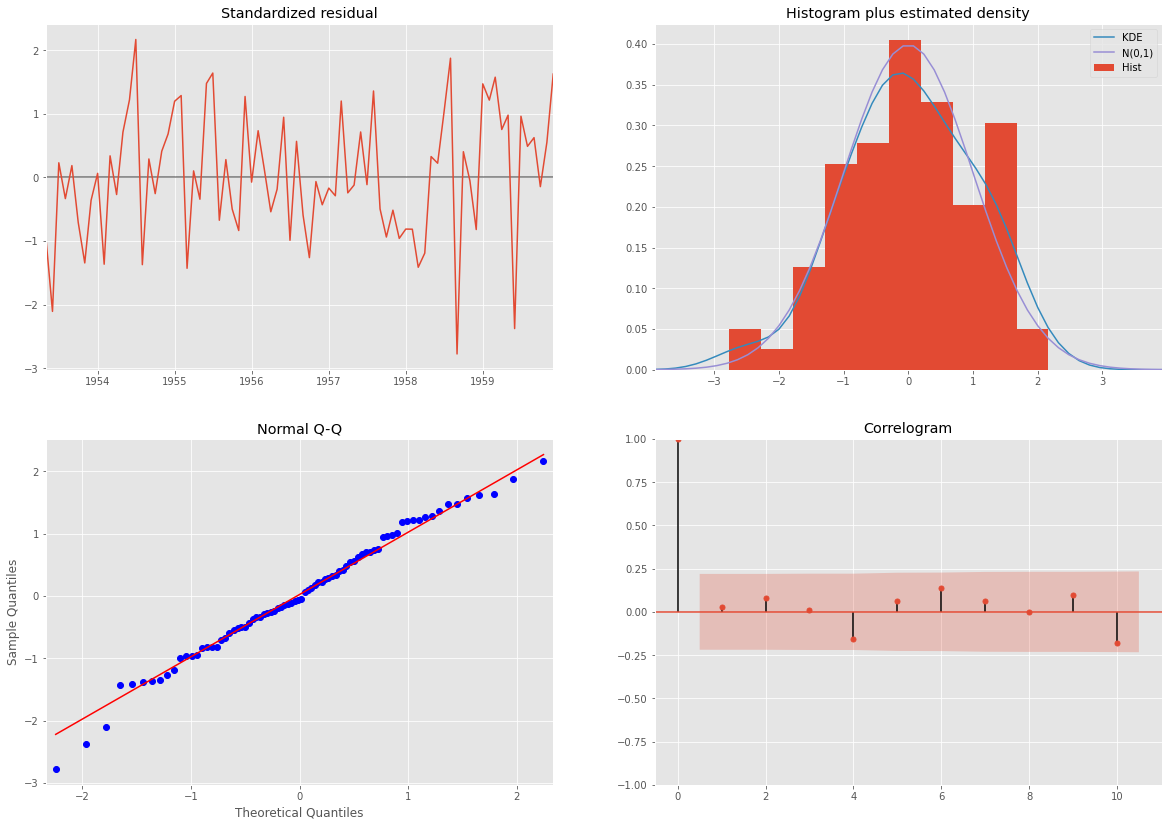

In [141]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [145]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          #Passengers   No. Observations:                  132
Model:             SARIMAX(3, 1, 0)x(3, 1, [1], 12)   Log Likelihood                -301.103
Date:                              Thu, 25 Jun 2020   AIC                            618.206
Time:                                      00:45:32   BIC                            637.262
Sample:                                  01-01-1949   HQIC                           625.846
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3524      0.115     -3.072      0.002      -0.577      -0.128
ar.L2         -0.0293      0.152     -0.192      0.848      -0.328       0.269
ar.L3          0.0017      0.127      0.014      0.989      -0.247       0.250
ar.S.L12       0.6869      0.236      2.906      0.004       0.224       1.150
ar.S.L24       0.2884      0.140      2.064      0.039       0.015       0.562
ar.S.L36       0.0084      0.018      0.473      0.636      -0.026       0.043
ma.S.L12      -0.9999   1481.232     -0.001      0.999   -2904.162    2902.162
sigma2        86.7684   1.29e+05      0.001      0.999   -2.52e+05    2.52e+05
===================================================================================
Ljung-Box (Q):                       39.12   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.51   Prob(JB):                         0.67
Heteroskedasticity (H):               1.28   Skew:                            -0.23
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### RESULTS

### Now let's create some predictions . We will use 3 methods:

#### 1) In Sample prediction with 1 step ahead forecasting of the last year(1959) .In this case the model is used to predict data that the model was built on 1 -step ahead forecating implies that each forecasted point is used to predict the following one.

In [146]:
pred0 = results.get_prediction(start='1958-01-01',dynamic=False)
pred0_ci = pred0.conf_int()
#pred0_ci

#### 2) In sample prediction with dynamic forecasting of the last year(1959).Again the model is used to predict data that the model was built on 

In [154]:
pred1 = results.get_prediction(start='1958-01-01',dynamic=True)
pred1_ci = pred1.conf_int()
#pred1_ci

#### 3) TRue forecating of out of sample data . In this case the model is asked to predict the data it has ot seen before.

In [163]:
pred2 =results.get_forecast('1963-12-01')
pred2_ci = pred2.conf_int()
pred2_ci

,lower #Passengers,upper #Passengers
1960-01-01,400.104442,438.882916
1960-02-01,374.741239,420.921190
1960-03-01,433.656038,488.056391
1960-04-01,418.934182,479.962356
1960-05-01,440.982373,508.123028
1960-06-01,501.490488,574.205970
1960-07-01,575.935982,653.833155
1960-08-01,586.832572,669.586894
1960-09-01,475.662791,563.004646
1960-10-01,416.401674,508.101934


In [164]:
print(pred2.predicted_mean['1960-01-01' : '1960-12-01'])

1960-01-01    419.493679
1960-02-01    397.831215
1960-03-01    460.856214
1960-04-01    449.448269
1960-05-01    474.552700
1960-06-01    537.848229
1960-07-01    614.884569
1960-08-01    628.209733
1960-09-01    519.333718
1960-10-01    462.251804
1960-11-01    412.160210
1960-12-01    452.660163
Freq: MS, dtype: float64


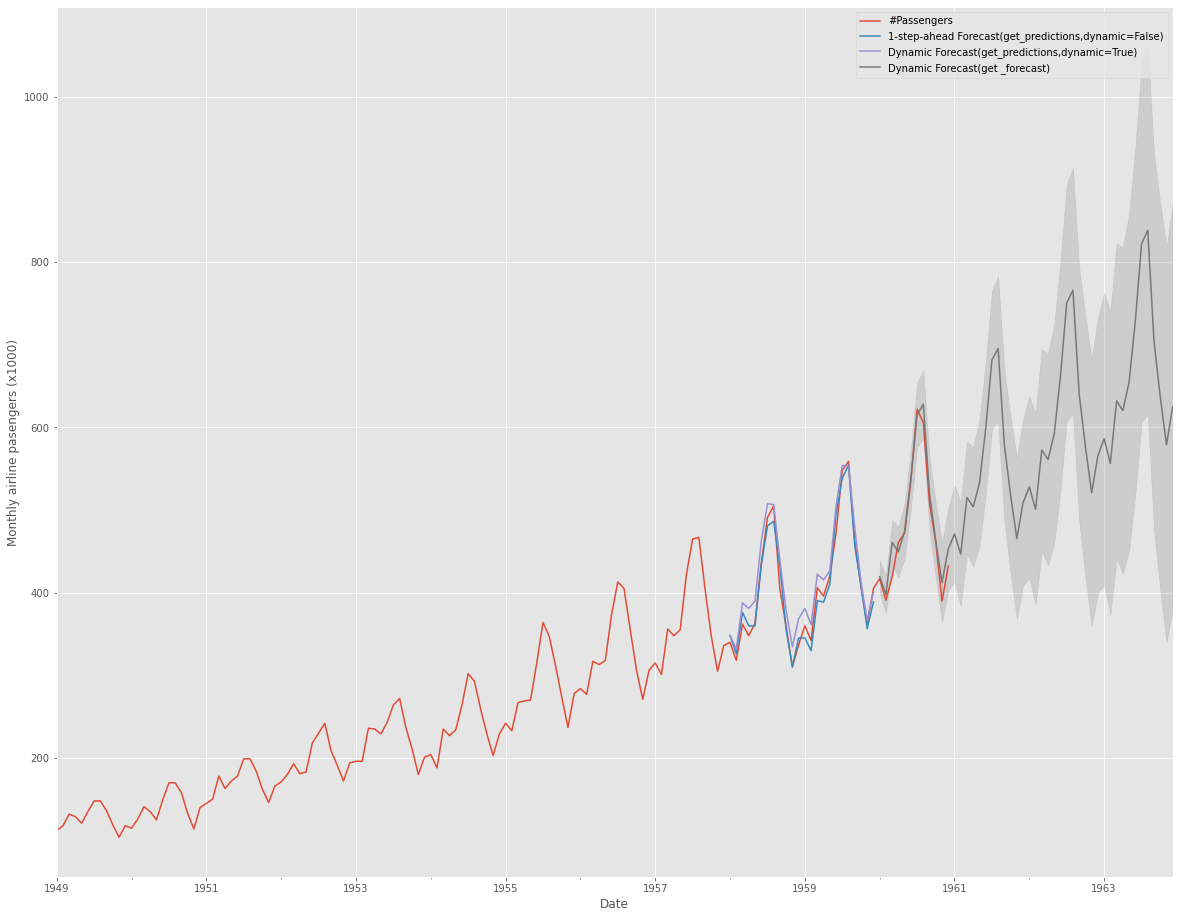

In [166]:
ax = df.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax,label='1-step-ahead Forecast(get_predictions,dynamic=False)')
pred1.predicted_mean.plot(ax=ax,label='Dynamic Forecast(get_predictions,dynamic=True)')
pred2.predicted_mean.plot(ax=ax,label='Dynamic Forecast(get _forecast)')
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=0.1)
plt.ylabel('Monthly airline pasengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [177]:
prediction = pred2.predicted_mean['1960-01-01' : '1960-12-01'].values
#flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
#Mean absolute percentage error
MAPE = np.mean(np.abs((truth-prediction)/truth))*100
print('The Mean absolute percentage error for the forecast of year 1960 is {}'.format(MAPE))

The Mean absolute percentage error for the forecast of year 1960 is 2.807478595865453
